In [1]:
# ANN classification on MNIST dataset
# loading libraries
import sys
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.models import Model
import keras
from tqdm import tqdm
from keras.callbacks import Callback

In [2]:
# function to load dataset from keras
def load_dataset(name):
    # load dataset
    (trainX, trainY), (testX, testY) = name.load_data()
    # shape of dataset
    train_shape, test_shape = [trainX.shape, trainY.shape], [testX.shape, testY.shape]
    num_classes = len(np.unique(trainY))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY, train_shape, test_shape

In [3]:
trainX, trainY, testX, testY, train_shape, test_shape = load_dataset(mnist)

In [4]:
# processing the data
def data_process(trainX, testX):
    # convert from integers to floats
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    # normalize to range 0-1
    trainX = trainX / 255.0
    testX = testX / 255.0
    trainX = trainX.reshape((len(trainX), np.prod(trainX.shape[1:])))
    testX = testX.reshape((len(testX), np.prod(testX.shape[1:])))
    # return normalized images
    return trainX, testX

In [5]:
# diagnostic plots
def diagnostic_plots(history):
    # plot for loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='red', label='train')
    plt.plot(history.history['val_loss'], color='blue', label='test')
    plt.legend()
    # plot for accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='red', label='train')
    plt.plot(history.history['val_accuracy'], color='blue', label='test')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
# ann model architecture
def define_model():
    # define model
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=64))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
class tqdm_cb(Callback):
    def __init__(self, total):
        super().__init__()
        self.total = total
        self.pbar = None

    def on_train_begin(self, logs=None):
        self.pbar = tqdm(total=self.total, desc='Training model')

    def on_epoch_end(self, epoch, logs=None):
        self.pbar.update(1)
        self.pbar.set_postfix(loss=logs['loss'], accuracy=logs['accuracy'])

    def on_train_end(self, logs=None):
        self.pbar.close()

def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY, train_shape, test_shape = load_dataset(mnist)
    # process data
    trainX, testX = data_process(trainX, testX)
    # load encoder model
    encoder = keras.models.load_model('../Autoencoders Model/encoder_model.keras')
    encoded_imgs_train = encoder.predict(trainX)
    encoded_imgs_test = encoder.predict(testX)
    # define model
    model = define_model()
    history = model.fit(encoded_imgs_train, trainY, epochs=100, batch_size=64, validation_data=(encoded_imgs_test, testY), verbose=0, callbacks=[tqdm_cb(100)])
    # evaluate model
    _, acc = model.evaluate(encoded_imgs_test, testY, verbose=0)
    print('> Accuracy: %.3f' % (acc * 100.0))
    diagnostic_plots(history)
    # save model , install hp5py
    model.save('cnn_model.keras')

313/313 [==============================] - 1s 2ms/step


Training model: 100%|██████████| 100/100 [02:44<00:00,  1.65s/it, accuracy=0.99, loss=0.0304] 


> Accuracy: 97.490


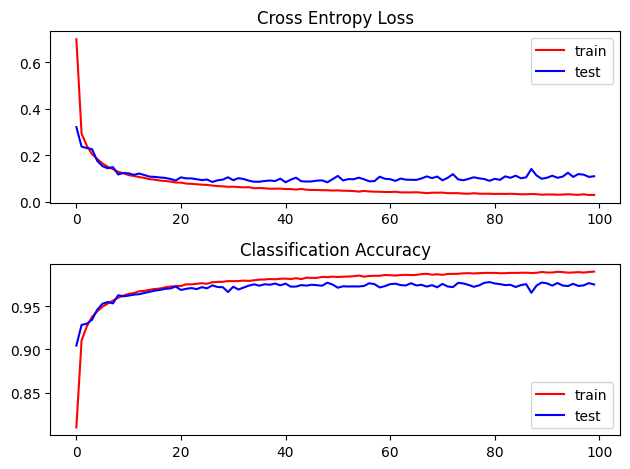

In [8]:
run_test_harness()